In [1]:
import pandas as pd
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

# Data Visualization

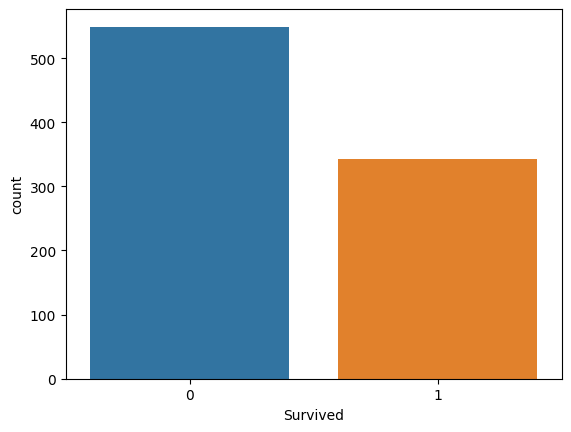

In [4]:
sns.countplot(x='Survived', data=titanic_df);

> There are 500+ unsurvived and 300+ survived

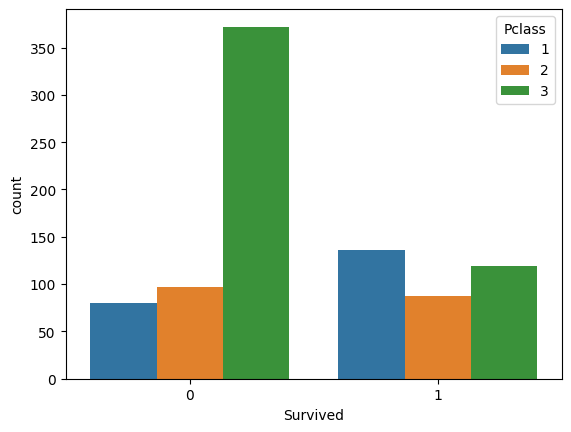

In [5]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_df);

> Lower classes have lower chance of surviving. Passengers in higher classes are more likely to survive

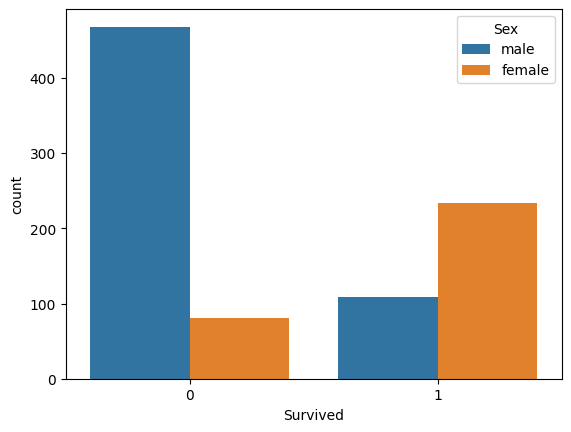

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic_df);

> Females have higher chances in surviving

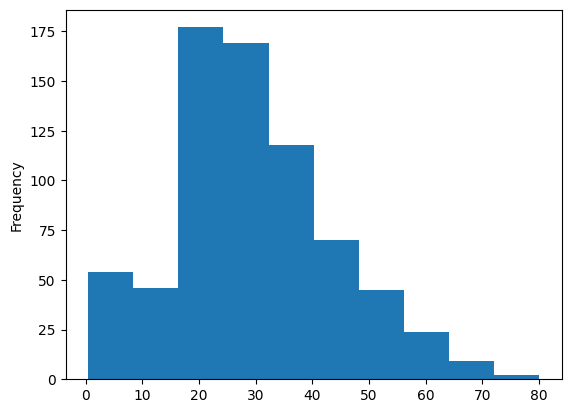

In [7]:
titanic_df['Age'].plot.hist();

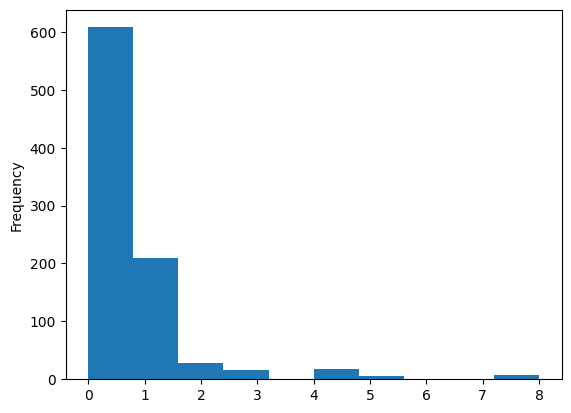

In [8]:
titanic_df['SibSp'].plot.hist();

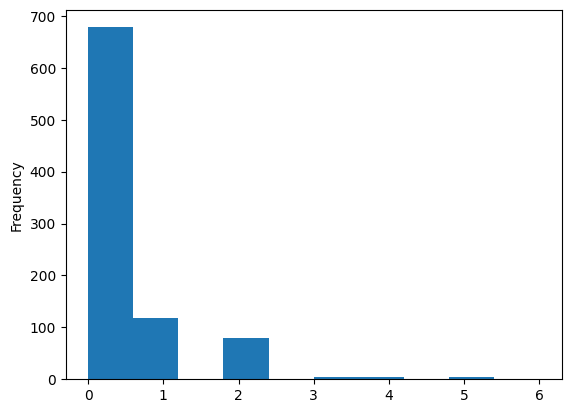

In [9]:
titanic_df['Parch'].plot.hist();

> Most passengers don't travel with their families

# Data Wrangling

In [10]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> Remove the Cabin column as it  isn't necessary

In [11]:
titanic_df.drop('Cabin', axis=1,inplace=True)

> Remove the null values

In [12]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Use One-hot encoding to convert categorical data (Embarked, Sex, Pclass)**

In [13]:
Sex = pd.get_dummies(titanic_df['Sex'], dtype=int, drop_first=True)
Embarked = pd.get_dummies(titanic_df['Embarked'], dtype=int, drop_first=True)
Pclass = pd.get_dummies(titanic_df['Pclass'], dtype=int, drop_first=True)

In [14]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [16]:
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [17]:
titanic_df = pd.concat([titanic_df, Sex, Embarked, Pclass], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [18]:
titanic_df.drop(['Sex', 'Pclass', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [19]:
titanic_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Now Data is ready

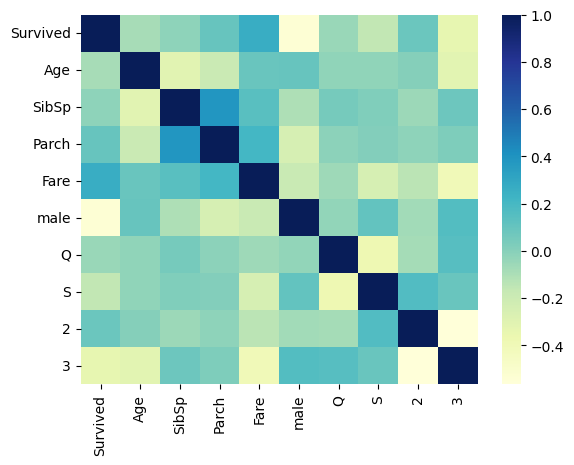

In [20]:
sns.heatmap(titanic_df.corr(), cmap='YlGnBu');

> Conclusion: Survival depends mostly on sex, age and pclass or fare (as expected)

# Model training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
X = titanic_df.drop('Survived', axis=1)
Y= titanic_df['Survived']
X.columns = X.columns.astype(str)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [23]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, Y_train)
pred = LR.predict(X_test)

In [24]:
classification_report(Y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.91      0.86        87\n           1       0.83      0.70      0.76        56\n\n    accuracy                           0.83       143\n   macro avg       0.83      0.80      0.81       143\nweighted avg       0.83      0.83      0.82       143\n'

In [25]:
confusion_matrix(Y_test, pred)

array([[79,  8],
       [17, 39]])

In [26]:
accuracy_score(Y_test, pred)

0.8251748251748252

**The accuracy reached 82.5%**